**Import Library**

In [1]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import torch.nn.functional as F

**CIFAR10 Dataset**

In [2]:
train_dataset = torchvision.datasets.CIFAR10(root = '/content/drive/MyDrive/CV', train = True,
                                            transform = transforms.ToTensor(), download = True )

test_dataset = torchvision.datasets.CIFAR10(root = '/content/drive/MyDrive/CV', train = False,
                                            transform = transforms.ToTensor(), download = True)

Files already downloaded and verified
Files already downloaded and verified


**Hyperperameter**

In [3]:
num_epochs = 5
num_classes = 10
batch_size = 100
learning_rate = 0.001

**Data Loader**

In [4]:
train_loader = torch.utils.data.DataLoader(dataset = train_dataset, 
                                           batch_size = batch_size,
                                           shuffle = True)
test_loader = torch.utils.data.DataLoader(dataset = test_dataset,
                                          batch_size = batch_size, 
                                          shuffle = False)
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

**Convolution Neural Network**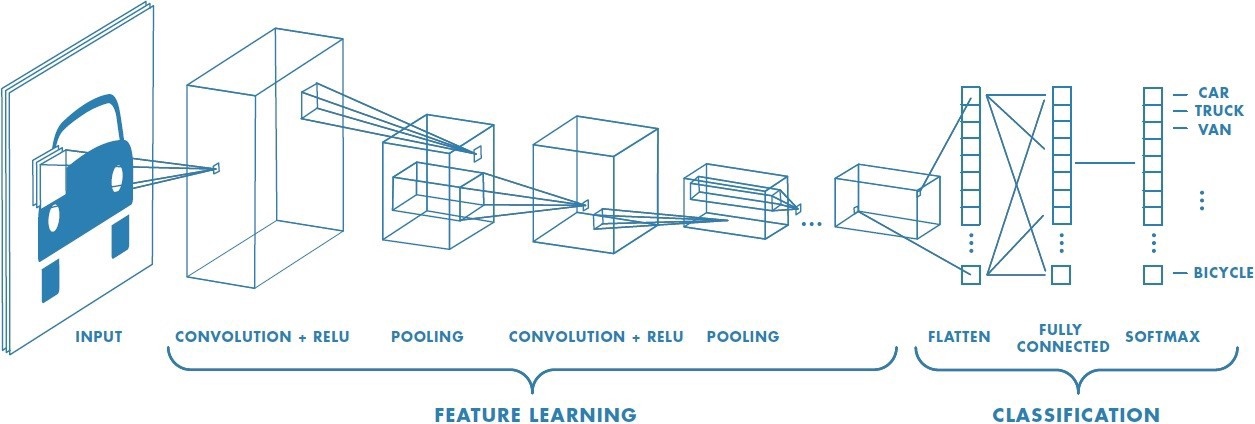

In [5]:
class CNN(nn.Module):
  def __init__(self, num_classes):
    super(CNN, self).__init__()
    self.conv1 = nn.Conv2d(3,12,3)
    self.batch_n1 = nn.BatchNorm2d(12)
    """Batch normalization (also known as batch norm) is a method used to make
     artificial neural networks faster and more stable through normalization of
      the layers' inputs by re-centering and re-scaling."""
    self.pool = nn.MaxPool2d(2,2)
    self.conv2 = nn.Conv2d(12, 20,3)
    self.batch_n2 = nn.BatchNorm2d(20)
    self.fc1 = nn.Linear(12*20*3, 120)## 
    self.fc2 = nn.Linear(120,84)
    self.fc3 = nn.Linear(84,num_classes)

  def forward(self, x):
    x = self.pool(F.relu(self.batch_n1((self.conv1(x)))))
    x = self.pool(F.relu(self.batch_n2((self.conv2(x)))))
    x = x.view(-1, 12*20*3) ### Here, -1 is number of batch_size
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    output = self.fc3(x)
    return output

In [6]:
model = CNN(num_classes = 10)

**Loss and optimizer**

In [7]:
criterion = nn.CrossEntropyLoss() #In CrossEntropyLoss contains softmax, so don't need use softmax() in last fully connected layer
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate )

**Train the model**

In [8]:
total_step = len(train_loader)
for epoch in range(num_epochs):
  for i, (image,label) in enumerate(train_loader):
    #print(image, label)
    #Forward pass
    output = model(image)
    #Loss calculate
    loss = criterion(output, label)
    #Backward and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()


    if (i+1) % 100 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
                   .format(epoch+1, num_epochs, i+1, total_step, loss.item()))




Epoch [1/5], Step [100/500], Loss: 1.4915
Epoch [1/5], Step [200/500], Loss: 1.4845
Epoch [1/5], Step [300/500], Loss: 1.3077
Epoch [1/5], Step [400/500], Loss: 1.2086
Epoch [1/5], Step [500/500], Loss: 1.0973
Epoch [2/5], Step [100/500], Loss: 0.9119
Epoch [2/5], Step [200/500], Loss: 1.3223
Epoch [2/5], Step [300/500], Loss: 1.0863
Epoch [2/5], Step [400/500], Loss: 1.1239
Epoch [2/5], Step [500/500], Loss: 0.9206
Epoch [3/5], Step [100/500], Loss: 1.0062
Epoch [3/5], Step [200/500], Loss: 1.0148
Epoch [3/5], Step [300/500], Loss: 1.0565
Epoch [3/5], Step [400/500], Loss: 1.0636
Epoch [3/5], Step [500/500], Loss: 1.1202
Epoch [4/5], Step [100/500], Loss: 1.0873
Epoch [4/5], Step [200/500], Loss: 0.6567
Epoch [4/5], Step [300/500], Loss: 0.9702
Epoch [4/5], Step [400/500], Loss: 0.6426
Epoch [4/5], Step [500/500], Loss: 0.9795
Epoch [5/5], Step [100/500], Loss: 0.8935
Epoch [5/5], Step [200/500], Loss: 0.8800
Epoch [5/5], Step [300/500], Loss: 0.7300
Epoch [5/5], Step [400/500], Loss:

In [9]:

model.eval()  # eval mode (batchnorm uses moving mean/variance instead of mini-batch mean/variance)
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print('Test Accuracy of the model on the 10000 test images: {} %'.format(100 * correct / total))

Test Accuracy of the model on the 10000 test images: 64.93 %


In [38]:
class_correct = list(0 for i in range(10))
class_total = list(0 for i in range(10))
with torch.no_grad():
    for images, labels in test_loader:
        outputs = model(images)
        #print(outputs)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels)
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i]
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (   
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 70 %
Accuracy of   car : 75 %
Accuracy of  bird : 34 %
Accuracy of   cat : 25 %
Accuracy of  deer : 57 %
Accuracy of   dog : 65 %
Accuracy of  frog : 67 %
Accuracy of horse : 75 %
Accuracy of  ship : 85 %
Accuracy of truck : 82 %
